Corresponding video https://youtu.be/wQy8gpNDL4w

# 1. K nearest neighbours classifier

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
plt.rc('font', **{'size':22})

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv', sep=';').iloc[:100]
df.head(3)

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0


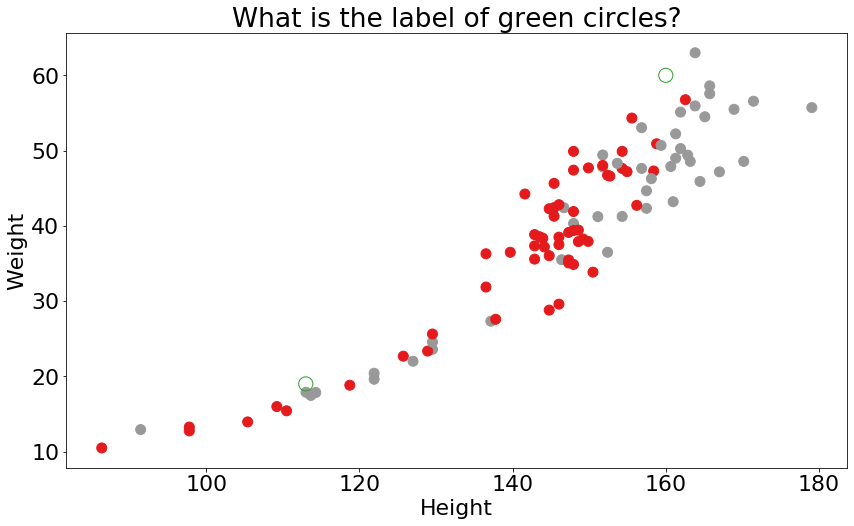

In [5]:
plt.figure(figsize=(14, 8))
plt.scatter(df['height'], df['weight'], c=df['male'], cmap='Set1', s=100)
plt.xlabel('Height')
plt.ylabel('Weight')

plt.scatter(113, 19, marker='o', s=200, facecolors='none', edgecolors='tab:green')
plt.scatter(160, 60, marker='o', s=200, facecolors='none', edgecolors='tab:green')
plt.title('What is the label of green circles?');

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# 2. K-fold cross-validation.

Instead of using `train` and `test` set, we will use `k fold` cross validation.
![](http://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png)

http://ethen8181.github.io/machine-learning/model_selection/model_selection.html

In [7]:
from sklearn.model_selection import KFold

### Example k fold

In [10]:
x = list(range(20))
cv = KFold(n_splits=5, shuffle=True, random_state=5)

for train, test in cv.split(x):
    print(train, test)

[ 0  1  3  4  6  7  8  9 10 11 12 13 14 15 16 18] [ 2  5 17 19]
[ 0  2  3  4  5  6  7  8  9 13 14 15 16 17 18 19] [ 1 10 11 12]
[ 0  1  2  3  5  6  8  9 10 11 12 14 15 16 17 19] [ 4  7 13 18]
[ 1  2  3  4  5  6  7 10 11 12 13 14 15 17 18 19] [ 0  8  9 16]
[ 0  1  2  4  5  7  8  9 10 11 12 13 16 17 18 19] [ 3  6 14 15]


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [13]:
X = df[['height','weight','age']]
y = df['male']

In [14]:
cv = KFold(n_splits=5, shuffle=True, random_state=7)

test_score = []

for train, test in cv.split(X, y):
    # Subset of data goes to train and test folds
    X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y[train], y[test]
    print(X_train.shape, X_test.shape)
    
    # Train a classifier
    clf = KNeighborsClassifier(5)
    clf.fit(X_train, y_train)
    
    # Predict test data
    y_pred = clf.predict(X_test)
    test_score.append(accuracy_score(y_test, y_pred))
    
print(np.mean(test_score), np.std(test_score))

(80, 3) (20, 3)
(80, 3) (20, 3)
(80, 3) (20, 3)
(80, 3) (20, 3)
(80, 3) (20, 3)
0.6700000000000002 0.14696938456699069


In [15]:
test_score

[0.7, 0.9, 0.6, 0.7, 0.45]

### Instead of writing this manually we could use `cross_val_score`

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
cv = KFold(n_splits=5, shuffle=True, random_state=7)
clf = KNeighborsClassifier(5)

cross_val_score(clf, X, y, cv=cv)

array([0.7 , 0.9 , 0.6 , 0.7 , 0.45])

### Use `cross_val_predict` to get out of fold predictions

In [19]:
from sklearn.model_selection import cross_val_predict

In [21]:
cv = KFold(n_splits=5, shuffle=True, random_state=7)

test_score = []

for train, test in cv.split(X, y):
    # Subset of data goes to train and test folds
    X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y[train], y[test]
    print(X_train.shape, X_test.shape)
    
    # Train a classifier
    clf = KNeighborsClassifier(5)
    clf.fit(X_train, y_train)
    
    # Predict test data
    y_pred = clf.predict(X_test)
    test_score.append(y_pred)
    
# print(np.mean(test_score), np.std(test_score))

(80, 3) (20, 3)
(80, 3) (20, 3)
(80, 3) (20, 3)
(80, 3) (20, 3)
(80, 3) (20, 3)


In [22]:
test_score

[array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]),
 array([0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1]),
 array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1]),
 array([0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0])]

In [20]:
cv = KFold(n_splits=5, shuffle=True, random_state=7)
clf = KNeighborsClassifier(5)

cross_val_predict(clf, X, y, cv=cv)

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

# 3. Grid search

- KNN(3) --> `cross_val_score`
- KNN(4) --> `cross_val_score`
- ...
- KNN(20) --> `cross_val_score`

---
> Store all hyperparameters (k) and the corresponding perfomancies (estimated on cross validation)

### Manual grid search

In [23]:
cv = KFold(n_splits=5, shuffle=True, random_state=7)

cv_scores = {}
test_score = []

for n_neighbours in range(3, 22):
    # --------------------------
    for train, test in cv.split(X, y): 
        X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y[train], y[test]

        # Train a classifier
        clf = KNeighborsClassifier(n_neighbours)
        clf.fit(X_train, y_train)

        # Predict test data
        y_pred = clf.predict(X_test)
        test_score.append(accuracy_score(y_test, y_pred))
    #-----------------------------------  
    cv_scores[n_neighbours] = np.mean(test_score)
    
print(cv_scores)

{3: 0.6599999999999999, 4: 0.66, 5: 0.6633333333333333, 6: 0.6700000000000002, 7: 0.674, 8: 0.6783333333333335, 9: 0.6842857142857144, 10: 0.6900000000000001, 11: 0.6966666666666667, 12: 0.6990000000000001, 13: 0.7009090909090908, 14: 0.7016666666666668, 15: 0.7023076923076923, 16: 0.7042857142857143, 17: 0.7066666666666666, 18: 0.7074999999999999, 19: 0.708235294117647, 20: 0.7088888888888889, 21: 0.7094736842105263}


### Manual grid search but better

In [25]:
cv = KFold(n_splits=5, shuffle=True, random_state=7)

cv_scores = {}

for n_neighbours in range(3, 22):
    clf = KNeighborsClassifier(n_neighbours)
    cv_scores[n_neighbours] = cross_val_score(clf, X, y, cv=cv).mean()
    
print(cv_scores)

{3: 0.6599999999999999, 4: 0.6599999999999999, 5: 0.6700000000000002, 6: 0.6900000000000001, 7: 0.6899999999999998, 8: 0.7, 9: 0.72, 10: 0.7300000000000001, 11: 0.75, 12: 0.72, 13: 0.72, 14: 0.7100000000000001, 15: 0.7100000000000001, 16: 0.73, 17: 0.74, 18: 0.72, 19: 0.72, 20: 0.72, 21: 0.72}


### Grid search using sklearn.model_selection.GridSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
cv = KFold(n_splits=5, shuffle=True, random_state=7)
clf = KNeighborsClassifier()

grid = {
    'n_neighbors':range(3,22,2)
}

gs = GridSearchCV(clf, param_grid=grid, cv=cv)
gs.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(3, 22, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
gs.cv_results_

{'mean_fit_time': array([0.00255027, 0.00282693, 0.00244575, 0.00196862, 0.00180326,
        0.00176091, 0.00227723, 0.00176888, 0.00171356, 0.00178604]),
 'std_fit_time': array([0.00049785, 0.00084132, 0.00067863, 0.00022142, 0.00034981,
        0.00019376, 0.00065324, 0.0002152 , 0.00010842, 0.00018123]),
 'mean_score_time': array([0.00294242, 0.00317049, 0.00235744, 0.00240855, 0.00202527,
        0.00204   , 0.00227189, 0.00222459, 0.00211205, 0.00227723]),
 'std_score_time': array([0.00079832, 0.0011822 , 0.0001249 , 0.00035736, 0.00015989,
        0.00017095, 0.00049853, 0.00030172, 0.00027011, 0.00032019]),
 'param_n_neighbors': masked_array(data=[3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11},
  {'n_neighbors'

In [30]:
gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [31]:
gs.best_score_

0.75

# 4. Random Search

> The idea is instead of using uniform grid, to arange points in a random fashion, thus cover larger sub-space of parameters

> If you do not know reasonable parameter space Random Search is computationally more efficient

![](https://miro.medium.com/max/1004/0*yDmmJmvRowl0cSN8.png)

---

Useful links

1. Comparison of GridSearchCV, RandomSearchCV and hyperopt https://www.kaggle.com/akurmukov/parameter-search-comparisons

2. https://towardsdatascience.com/random-search-vs-grid-search-for-hyperparameter-optimization-345e1422899d


In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

Here I define possible values of k between 2 and 70, and I want to test 10 random k values from this interval.

In [ ]:
X.shape

In [ ]:
KNeighborsClassifier()

In [36]:
params = {
    'n_neighbors': stats.randint(2, 70),
    'leaf_size': stats.randint(10, 50)
    
}

rs = RandomizedSearchCV(estimator=clf,
                       param_distributions=params,
                       n_iter=100,
                       cv=cv)
rs.fit(X, y)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=7, shuffle=True),
                   error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'leaf_size': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbf8fa28ad0>,
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbf90fc2a10>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [37]:
rs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=46, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [38]:
rs.best_score_

0.74